###### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
import warnings
warnings.filterwarnings('ignore')

##### Read dataset

In [3]:
fake = pd.read_csv("E:/IMARTICUS/Fake.csv")
true = pd.read_csv("E:/IMARTICUS/True.csv")

In [4]:
fake.shape

(23502, 172)

In [5]:
true.shape

(21417, 4)

##### Data cleaning and preparation

In [6]:
fake=fake.drop(fake.iloc[:,4:], axis=1)

In [7]:
fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17


In [8]:
fake['target'] = 'fake'
true['target'] = 'true'

In [9]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,fake


In [10]:
true.head(5)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17,true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17,true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17,true


In [11]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44919, 5)

In [12]:
data.head(5)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,fake


In [13]:
data.tail(5)

,title,text,subject,date,target
44914,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,22-Aug-17,true
44915,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,22-Aug-17,true
44916,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,22-Aug-17,true
44917,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,22-Aug-17,true
44918,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,22-Aug-17,true


In [14]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [15]:
# Check the data
data.head()

,title,text,subject,date,target
0,Merkel's CDU agrees to pursue grand coalition ...,BERLIN (Reuters) - Leaders of German Chancello...,worldnews,26-Nov-17,true
1,Swedish court sentences Syrian asylum seeker t...,STOCKHOLM (Reuters) - A Swedish court on Monda...,worldnews,25-Sep-17,true
2,Puerto Rico bailout more likely if Congress do...,WASHINGTON (Reuters) - Without action by Congr...,politicsNews,28-Jun-16,true
3,Secret Service Laptop Reportedly ‘Stolen’ had ...,21st Century Wire says A laptop was reportedly...,US_News,17-Mar-17,fake
4,BREAKING: Federal Judge STOPS Obamacare Transg...,O Connor found that the plaintiffs had standin...,left-news,31-Dec-16,fake


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44919 non-null  object
 1   text     44919 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44919 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [17]:
# Removing the date 
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Merkel's CDU agrees to pursue grand coalition ...,BERLIN (Reuters) - Leaders of German Chancello...,worldnews,true
1,Swedish court sentences Syrian asylum seeker t...,STOCKHOLM (Reuters) - A Swedish court on Monda...,worldnews,true
2,Puerto Rico bailout more likely if Congress do...,WASHINGTON (Reuters) - Without action by Congr...,politicsNews,true
3,Secret Service Laptop Reportedly ‘Stolen’ had ...,21st Century Wire says A laptop was reportedly...,US_News,fake
4,BREAKING: Federal Judge STOPS Obamacare Transg...,O Connor found that the plaintiffs had standin...,left-news,fake


In [18]:
# Removing the title
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,BERLIN (Reuters) - Leaders of German Chancello...,worldnews,true
1,STOCKHOLM (Reuters) - A Swedish court on Monda...,worldnews,true
2,WASHINGTON (Reuters) - Without action by Congr...,politicsNews,true
3,21st Century Wire says A laptop was reportedly...,US_News,fake
4,O Connor found that the plaintiffs had standin...,left-news,fake


In [24]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,berlin reuters leaders german chancellor angel...,worldnews,true
1,stockholm reuters swedish court monday sentenc...,worldnews,true
2,washington reuters without action congress hel...,politicsNews,true
3,21st century wire says laptop reportedly stole...,US_News,fake
4,connor found plaintiffs standing bring lawsuit...,left-news,fake


In [25]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [26]:
# Check
data.head()

,text,subject,target
0,berlin reuters leaders german chancellor angel...,worldnews,true
1,stockholm reuters swedish court monday sentenc...,worldnews,true
2,washington reuters without action congress hel...,politicsNews,true
3,21st century wire says laptop reportedly stole...,US_News,fake
4,connor found plaintiffs standing bring lawsuit...,left-news,fake


In [27]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
data.head()

,text,subject,target
0,berlin reuters leaders german chancellor angel...,worldnews,true
1,stockholm reuters swedish court monday sentenc...,worldnews,true
2,washington reuters without action congress hel...,politicsNews,true
3,21st century wire says laptop reportedly stole...,US_News,fake
4,connor found plaintiffs standing bring lawsuit...,left-news,fake


##### Basic data exploration

subject
 Karl Marx is either a villain or a hero of social engineering                                                                                                                                                                                                                                      2
 Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"                                                                                                                                                                               1
 a future nuclear family                                                                                                                                                                                                                                                                            2
 and so is Mr. Katzenbach                                                                                     

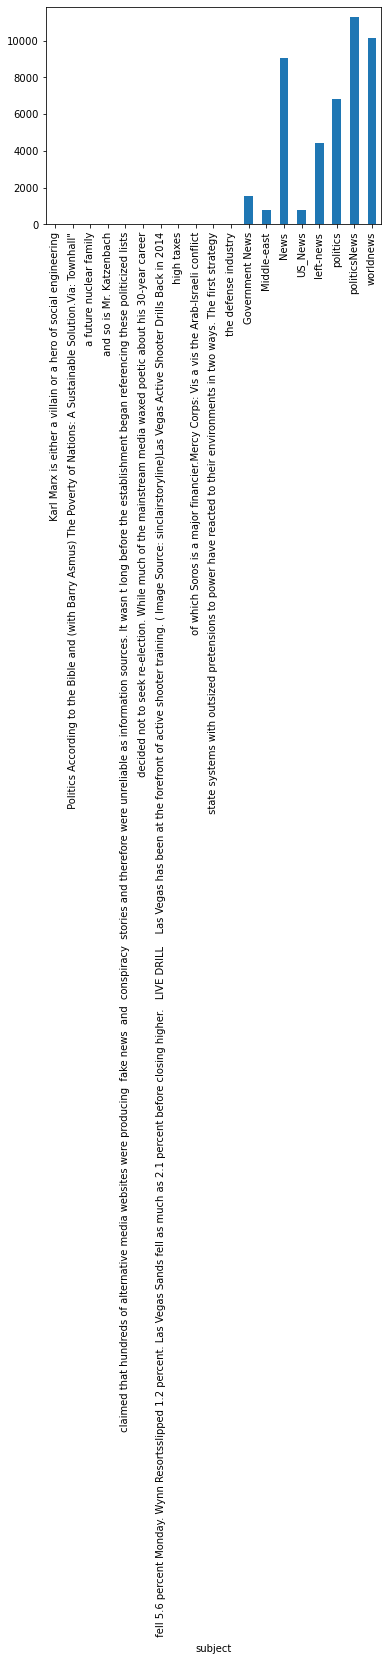

In [30]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23502
true    21417
Name: text, dtype: int64


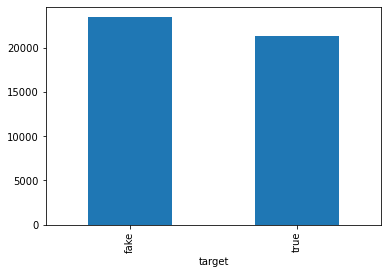

In [54]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [75]:
!pip install wordcloud

In [77]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

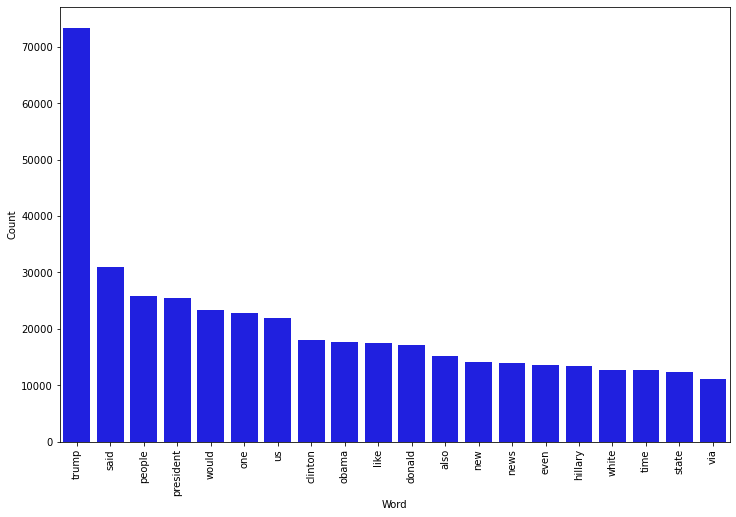

In [78]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)


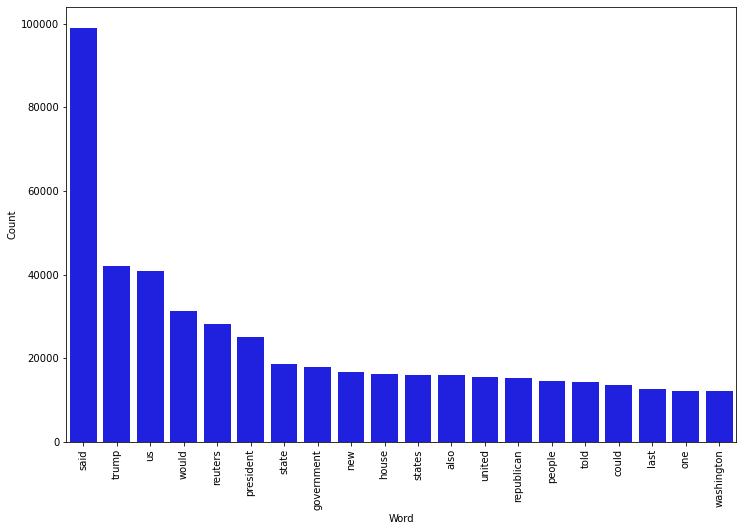

In [79]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)


##### Split Data

In [76]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [61]:
X_train.head()

22162    athens reuters two gunmen fired round shots he...
38456    september 15 hillary apparently held rally old...
27530    kara young biracial model dated donald trump b...
15650    sochi russia reuters russia respond immediatel...
7162     andrea mitchell annoyed president trump mike b...
Name: text, dtype: object

In [62]:
y_train.head()

22162    true
38456    fake
27530    fake
15650    true
7162     fake
Name: target, dtype: object

##### Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.77%


Confusion matrix, without normalization


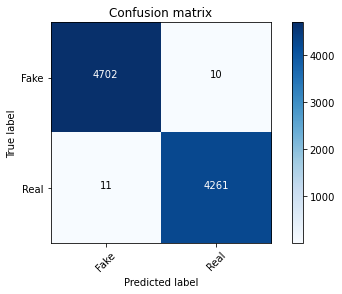

In [64]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])